<a href="https://colab.research.google.com/github/CheronoK/WEEK2-IP/blob/master/DSC4_Week2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 2 IP

## 1. Defining the Question

### 1.1 Specifying the Data Analytic Question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

### 1.2 Defining the Metric for Success

### 1.3 Understanding the context

### 1.4 Recording the Experimental Design

### 1.4 Data Relevance

## 2. Reading the Data

In [132]:
# Loading the Data from the source i.e. csv
# Dataset url = 'http://bit.ly/FinancialDataset'
#
#Importing libraries
import numpy as np
import pandas as pd
from subprocess import check_output
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
financial_df = pd.read_csv('http://bit.ly/FinancialDataset')

## 3. Checking the data

In [133]:
#Determining the numbe of records in the dataset
financial_df.shape

(23524, 13)

In [134]:
#Previewing the top of the dataset
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
#Previewing the bottom of the dataset
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
#Checking the datatypes for each column
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
#Displaying number of unique elements in each column
financial_df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [8]:
#Checking the number of null values in the dataset
financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

## 4. Tidying the Dataset

In [235]:
#Dropping all null values
financial_df2 = financial_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
financial_df6.isnull().any()

country                       False
has_a_bank_account             True
type_of_location              False
cell_phone_access             False
household_size                False
respondent_age                False
gender_of_respondent          False
the_relationship_with_head    False
marital_status                False
level_of_educuation           False
type_of_job                   False
dtype: bool

In [157]:
#Dropping the columns which will not help in our analysis i.e year and uniqueid
financial_df2.drop(columns=['year','uniqueid'], axis=1, inplace = True)
financial_df2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [158]:
#Removing spaces from the column names and replacing it with an underscore
financial_df2.columns = financial_df2.columns.str.replace(" ", "_")
#Changing the names of the columns to lowercase
financial_df2.columns = map(str.lower, financial_df2.columns)
#Changing the names of the columns that have typos in their names
financial_df3 = financial_df2.rename(columns={'the_relathip_with_head' : 'the_relationship_with_head'})
financial_df3.count()

country                       23343
has_a_bank_account            23343
type_of_location              23343
cell_phone_access             23343
household_size                23343
respondent_age                23343
gender_of_respondent          23343
the_relationship_with_head    23343
marital_status                23343
level_of_educuation           23343
type_of_job                   23343
dtype: int64

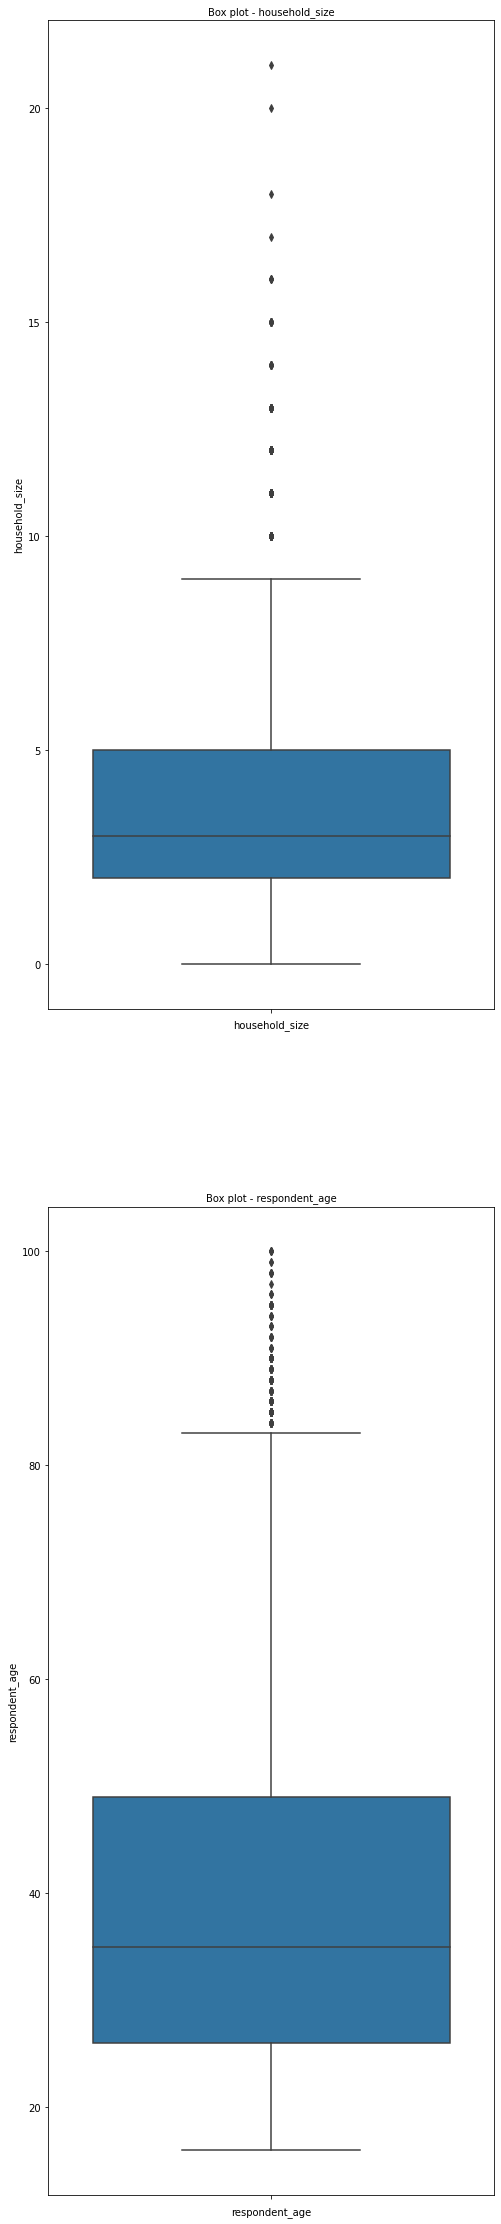

In [159]:
#Checking for outliers
col_names = ['household_size','respondent_age']
fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=financial_df3[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [160]:
#checking for anomalies using the interquartile range
Q1_householdsize = financial_df3['household_size'].quantile(.25)
Q3_householdsize = financial_df3['household_size'].quantile(.75)

IQR_householdsize = Q3_householdsize - Q1_householdsize

Q1_age = financial_df3['respondent_age'].quantile(.25)
Q3_age = financial_df3['respondent_age'].quantile(.75)

IQR_age = Q3_age - Q1_age
print(IQR_householdsize)
print(IQR_age)

3.0
23.0


household_size     2.0
respondent_age    18.0
dtype: float64


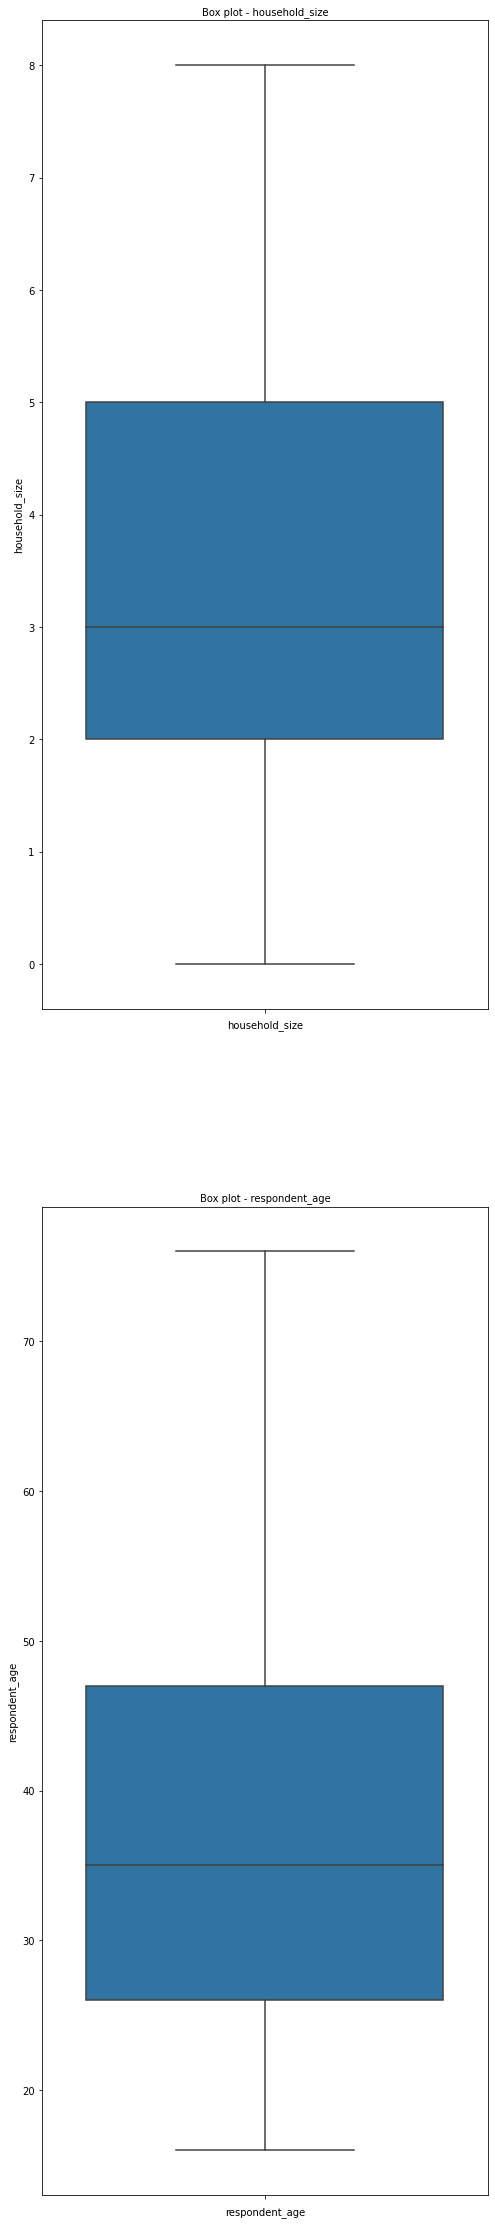

In [237]:
#Removing outliers using the Interquartile Range
Q2 = financial_df3.quantile(0.4)
Q3 = financial_df3.quantile(0.75)
IQR = Q3 - Q2
print(IQR)

financial_df4 = financial_df3[~((financial_df3< (Q2 - 1.5 * IQR)) |(financial_df3 > (Q3 + 1.5 * IQR))).any(axis=1)]

#checking if the outliers have been remooved
col_names = ['household_size','respondent_age']
fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=financial_df4[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [162]:
financial_df4.head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 5. Exploratory Analysis

### 5.1 UNIVARIATE ANALYSIS

#### 5.11 Measures of Central Tendency

In [163]:
#Calculating the mean of the numerical variables
print(financial_df4['household_size'].mean())
print(financial_df4['respondent_age'].mean())

3.5151625535015025
37.59675803660869


In [57]:
#Calculating the median 0f the numerical variables
print(financial_df4['household_size'].median())
print(financial_df4['respondent_age'].median())

3.0
35.0


In [60]:
#Calculating the mode of the numerical variables
print(financial_df4['household_size'].mode())
print(financial_df4['respondent_age'].mode())

0    2.0
dtype: float64
0    30.0
dtype: float64


#### 5.12 Measures of Dispersion

In [61]:
#Calculating the Standard Deviation of the numerical variables
print(financial_df4['household_size'].std())
print(financial_df4['respondent_age'].std())

1.9836610091209284
14.92413607371119


In [62]:
#Calculating the Variance of the numerical variables
print(financial_df4['household_size'].var())
print(financial_df4['respondent_age'].var())

3.93491099910666
222.72983754664767


In [72]:
#Calculating the range of the numerical variables

#Finding the minimum and maximum values
financial_df4_max = financial_df4['household_size'].max()
financial_df4_min = financial_df4['household_size'].min()
#Calculating the range
print(financial_df4_max - financial_df4_min)

#Finding the minimum and maximum values
financial_df4_max2 = financial_df4['respondent_age'].max()
financial_df4_min2 = financial_df4['respondent_age'].min()
#Calculating the range
print(financial_df4_max2 - financial_df4_min2)

8.0
60.0


In [67]:
#Finding the quantiles of the numerical variables
print(financial_df4['household_size'].quantile([0.25,0.5,0.75]))
print(financial_df4['respondent_age'].quantile([0.25,0.5,0.75]))

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
0.25    26.0
0.50    35.0
0.75    47.0
Name: respondent_age, dtype: float64


In [73]:
#Determining the skewness of the numerical variables
print(financial_df4['household_size'].skew())
print(financial_df4['respondent_age'].skew())

#The skewness is positive for both values meaning the distribution is skewed to the right

0.5060752186905365
0.6622271765478386


In [70]:
#Determining the kurtosis of the numerical variables
print(financial_df4['household_size'].kurt())
print(financial_df4['respondent_age'].kurt())

#Both kurtosis are less than zero hence this is a platykurtic distribution 

-0.7400587703163564
-0.42407106399510974


In [164]:
#Dispalying the summary statistics of the dataframe
financial_df4.describe()

,household_size,respondent_age
count,21962.000000,21962.000000
mean,3.515163,37.596758
std,1.983602,14.924119
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,47.000000
max,8.000000,76.000000


#### 5.13 Visualization Techniques

In [165]:
#Generating a frequency table from the categorical data
financial_df4.country.value_counts()
financial_df4.type_of_location.value_counts()
financial_df4.the_relationship_with_head.value_counts()
financial_df4.marital_status.value_counts()
financial_df4.type_of_job.value_counts()
financial_df4.level_of_educuation.value_counts()

Primary education                  12120
Secondary education                 4009
No formal education                 3914
Tertiary education                  1119
Vocational/Specialised training      772
6                                     22
Other/Dont know/RTA                    6
Name: level_of_educuation, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


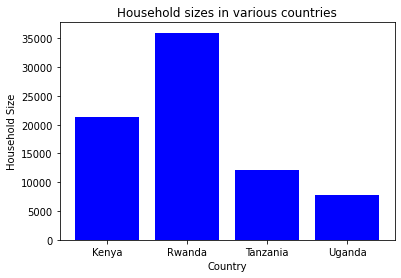

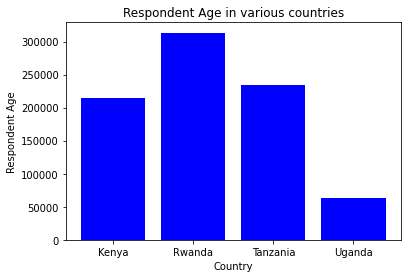

In [166]:
#Plotting bar charts for the house hold size and respondent age in different countries
financial_df5 = financial_df4.groupby('country')['household_size', 'respondent_age']
household_size = financial_df5.sum()['household_size']
country = household_size.index
plt.bar(country, household_size , color = 'blue')
plt.xlabel('Country')
plt.ylabel('Household Size')
plt.title('Household sizes in various countries')
plt.show()
respondent_age = financial_df5.sum()['respondent_age']
country = respondent_age.index
plt.bar(country, respondent_age , color = 'blue')
plt.xlabel('Country')
plt.ylabel('Respondent Age')
plt.title('Respondent Age in various countries')
plt.show()

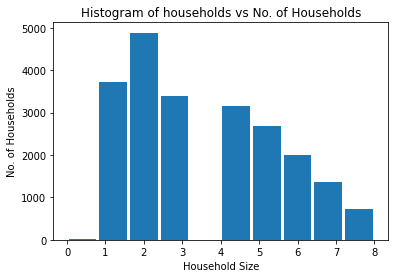

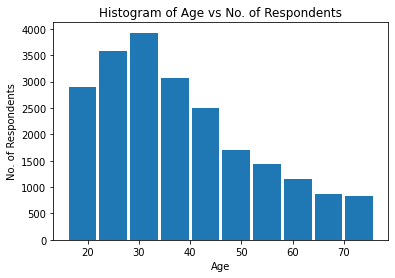

In [167]:
#Creating histograms using values from the household size and respondent age columns
sizes = financial_df4['household_size']

plt.hist(sizes, bins=10, histtype='bar', rwidth=0.9)
plt.ylabel('No. of Households')
plt.xlabel('Household Size')
plt.title('Histogram of households vs No. of Households')
plt.show()
ages = financial_df4['respondent_age']

plt.hist(ages, bins=10, histtype='bar', rwidth=0.9)
plt.ylabel('No. of Respondents')
plt.xlabel('Age')
plt.title('Histogram of Age vs No. of Respondents')
plt.show()

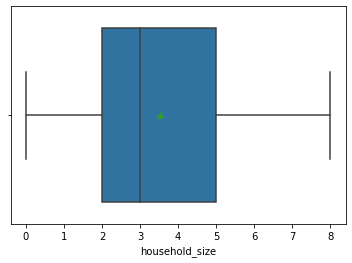

In [168]:
#Plotting a box plots using values from the household size column to display the distribution of data
sns.boxplot(financial_df4['household_size'], showmeans = True)

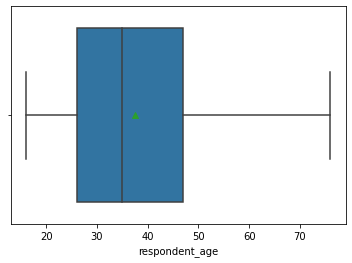

In [101]:
#Plotting a box plots using values from the respondent age column to display the distribution of data
sns.boxplot(financial_df4['respondent_age'], showmeans = True)

### 5.2 BIVARIATE ANALYSIS

#### 5.21 Scatter Plot

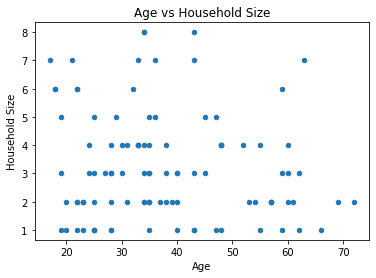

In [106]:
#Relationship between Numerical and Numerical data
#Determine the relationship between Household Sizes and the respondent's ages 
#Plotting a scatter plot for this
financial_df4[financial_df4['household_size']<100].sample(100).plot.scatter(x = 'respondent_age', y = 'household_size')
plt.title('Age vs Household Size')
plt.xlabel('Age')
plt.ylabel('Household Size')
plt.show()

# There is no relation because the points are scattered throughout the graph.

#### 5.22 Correlation

In [107]:
#Determining the correlation coefficient in order to determine the relationship of the household size and respondent's age
pearson_coeff = financial_df4['household_size'].corr(financial_df4['respondent_age'], method = "pearson")
print(pearson_coeff)

#The correlation coefficient of household size and age is -0.0879914925222228 hence these two variables are weakly correlated.

-0.0879914925222228


#### 5.23 Line Charts

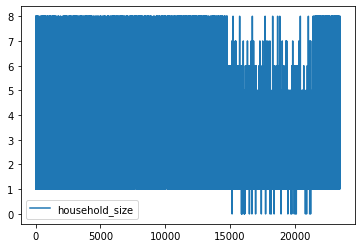

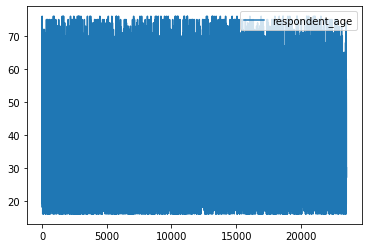

In [124]:
#Relationship between Categorical and Numerical data
#financial_df4.loc[financial_df4['country']=='Kenya'][["respondent_age"]].plot()
financial_df4[["household_size"]].plot()
financial_df4[['respondent_age']].plot()
plt.show()

### 5.3 MULTIVARIATE ANALYSIS

#### 5.31 Principal Component Analysis

In [238]:
#Dividing the dataset into a feature set and corresponding labels
X = financial_df4.drop('has_a_bank_account', 1)
y = financial_df4.has_a_bank_account
#Convert the categorical variable into dummy/indicator variables
X = pd.get_dummies(X)
X.head()

,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_6,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [239]:
#Splitting the Dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Performing standard scalar normalization to normalize the feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Performing PCA using Python's Scikit-Learn library
from sklearn.decomposition import PCA

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#Finding the "explained variance ratio"
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.10314645, 0.07502503, 0.06761151, 0.05237631, 0.05139496,
       0.04384691, 0.0411396 , 0.0367417 , 0.03313378, 0.03237229,
       0.03061534, 0.02728514, 0.02723586, 0.02578732, 0.02558273,
       0.02534945, 0.02503127, 0.02491607, 0.02479197, 0.02449958,
       0.02414195, 0.02338854, 0.02232099, 0.02088414, 0.01995735,
       0.01928889, 0.01583161, 0.01388769])

In [244]:
#Using 1 principal component to train the algorithm
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#This algorithm has been able to predict 3767 out of 4393 instances resulting in 85.55% accuracy

[[3757    0]
 [ 636    0]]
Accuracy 0.8552242203505577


#### 5.32 Factor Analysis

In [258]:
#Performing Adequacy Test to evaluate the “factorability” of our dataset
#Installing factor analyzer 
#Using Bartlett’s test of sphericity to check whether or not the observed variables intercorrelate at all
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(financial_df4)
chi_square_value, p_value
#The p-value is not 0. The test is statistically insignificant indicating that the observed correlation matrix is an identity matrix.
#We therefore cannot employ Factor Analysis

(170.8961433424777, 2.885118428937236e-14)

#### 5.33 Linear Discrimant Analysis

In [259]:
#Dividing the dataset into a feature set and corresponding labels
X = financial_df4.drop('has_a_bank_account', 1)
y = financial_df4.has_a_bank_account
#Convert the categorical variable into dummy/indicator variables
X = pd.get_dummies(X)
X.head()

,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_6,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [260]:
#Splitting the Dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [261]:
#Performing feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [262]:
#Performing Linear Discriminant Anaalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [263]:
#Training and making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [264]:
#Evaluating the perforance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

#The algorithm achieved an accuracy of 88.09% with linear discriminant which is greater than the accuracy achieved with one principal component which wa 85.52%

[[3702   55]
 [ 468  168]]
Accuracy0.8809469610744366
